<a href="https://colab.research.google.com/github/Neerav21/Alzheimer-s-Disease-Detection-Ensemble-Learning/blob/main/AZclassification5(wide).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The need for detection of Alzheimer's Disease

Alzheimer’s disease (AD) is the leading cause of dementia, and one of t leading causes of
death in the world.Unfortunately, all clinical
trials to reverse AD have failed so far . It is hypothesized that clinical trials
need to target patients at earlier stages before significant brain atrophies. But diagnosing
the disease at an early stage is challenging. The current method for early detection relies
on PET imaging, which is invasive and very costly. Various studies show that AD-related
brain degeneration begins years before the clinical onset of symptoms

# Choice of Model for detection of Alzheimer's Disease, CNN(Convolutional Neural Network):

A convolutional neural network is a class of deep, feed-forward artificial neural networks, most commonly applied to analyzing visual imagery.

In this neural network, the input features are taken batch-wise like a filter. This will help the network to remember the images in parts and can compute the operations. These computations involve the conversion of the image from the RGB scale to the Gray-scale. Once we have this, the changes in the pixel value will help to detect the edges, and images can be classified into different categories.

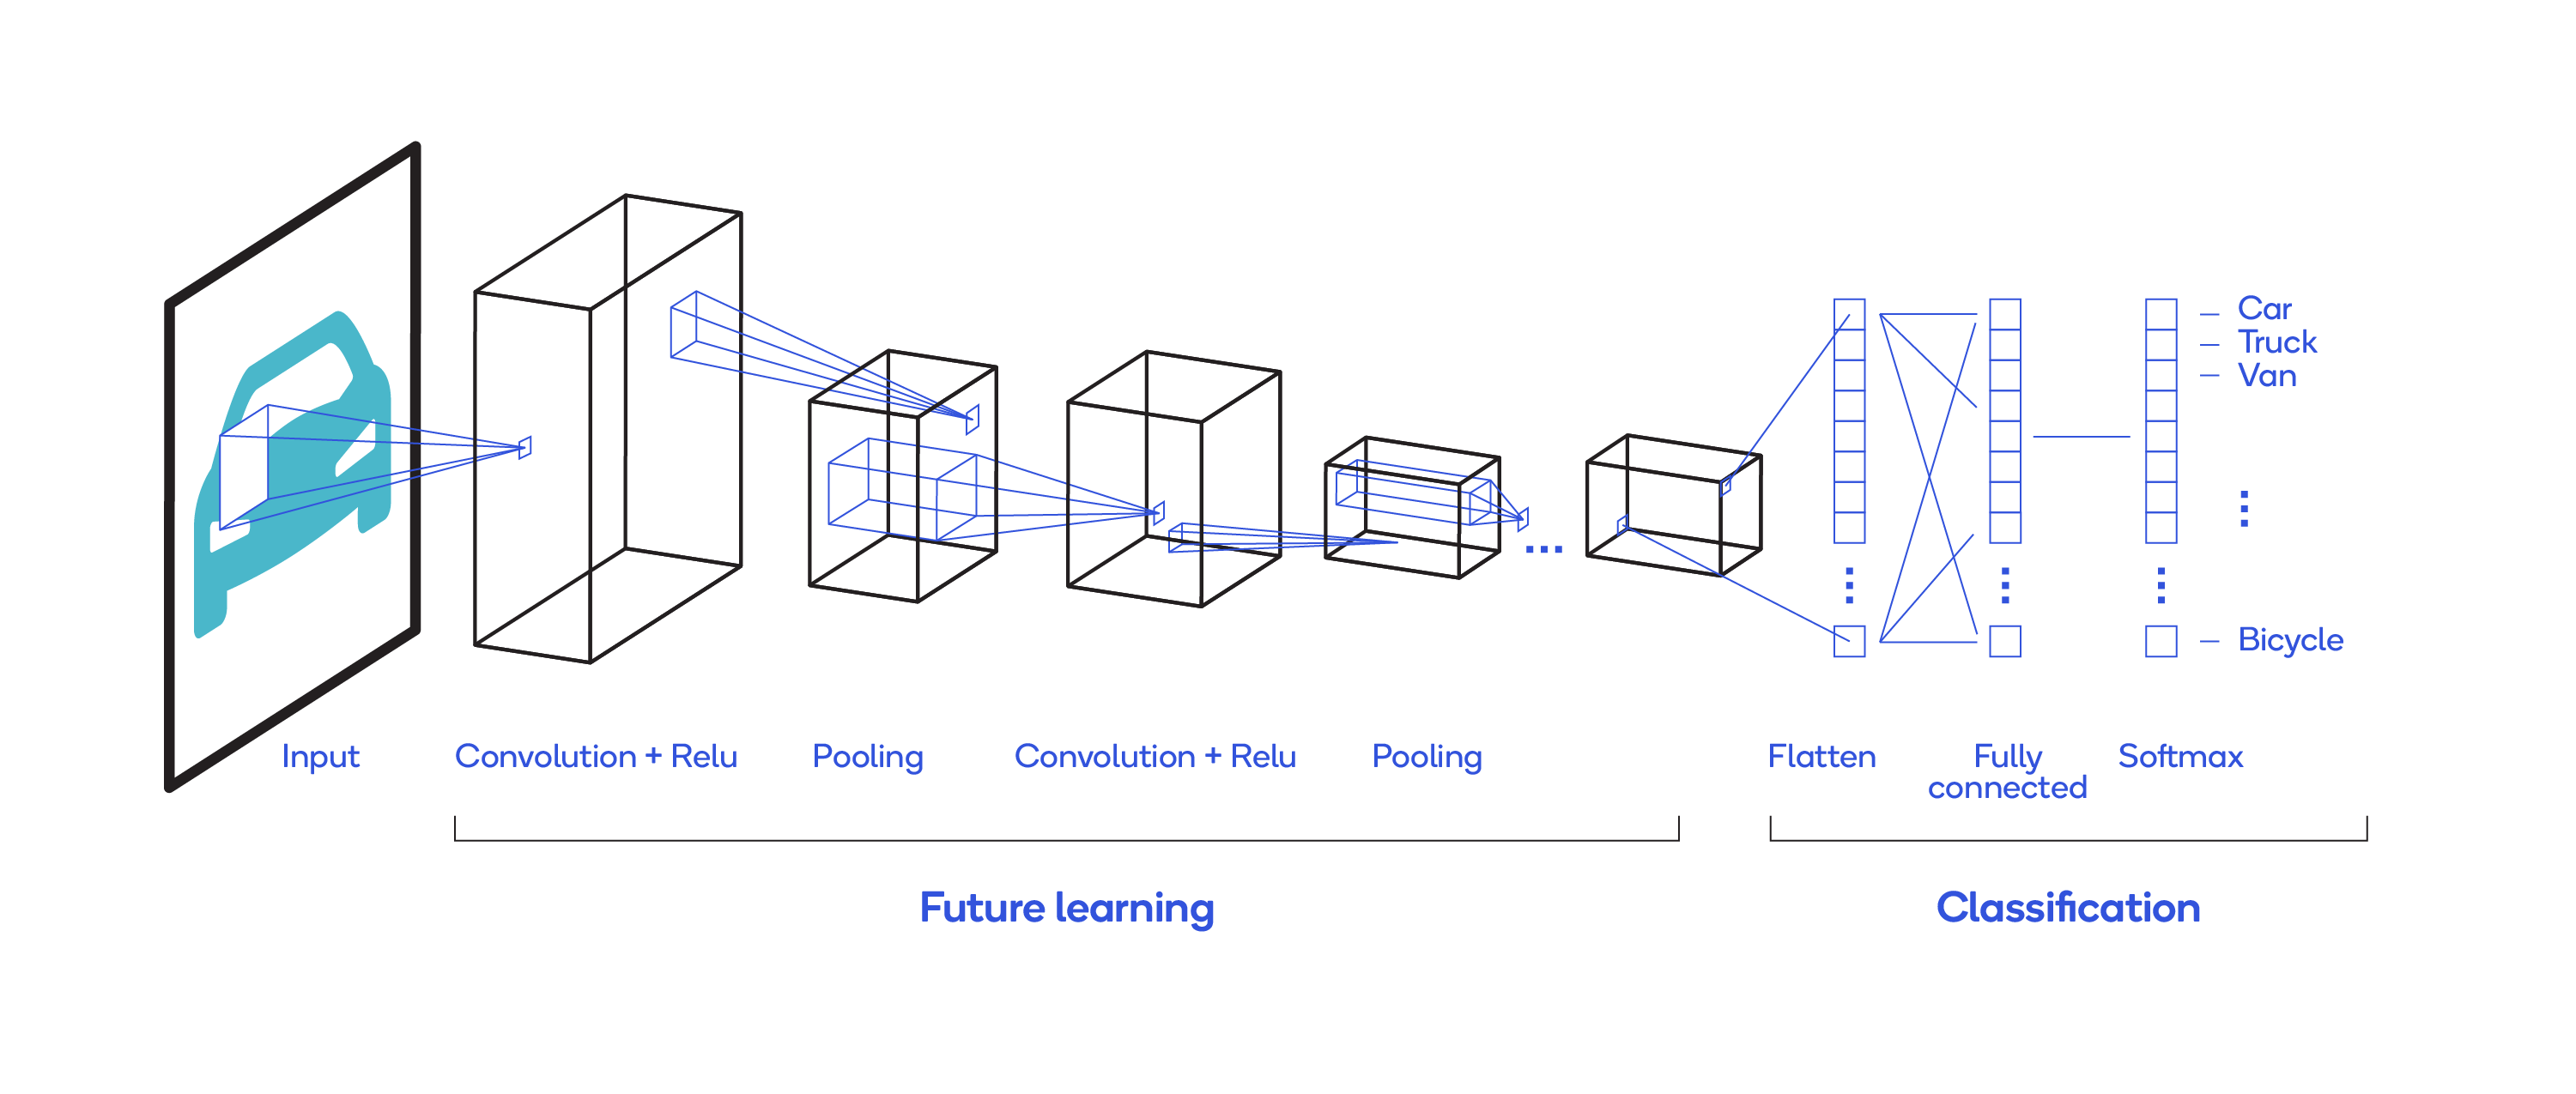)







**Loading Necessary Librararies and constants for building the model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow.keras import models
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob



In [ ]:
pip install keras_sequential_ascii

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-sequential-ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3063 sha256=c2c0f1d4a959cbcf1b60647ec8ebe8ffc48f376fba9c7ed6849c43ff83fbf502
  Stored in directory: /root/.cache/pip/wheels/4e/99/75/8910ced4b40e8c20088c237fa706b32ac758321482ae2659e3
Successfully built keras-sequential-ascii


In [ ]:
#use below code before training the model
#from keras_sequential_ascii import keras2ascii
#keras2ascii(model)

SET CONSTANTS

In [ ]:
BATCH_SIZE = 64
#inc to 64
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

# About Dataset

For this study, we use weighted structural MRI scans from the ADNI dataset (Mueller
et al. (2005)), which have undergone specific image preprocessing steps including multiplanar
reconstruction (MPR), Gradwarp, B1 non-uniformity correction, and N3 intensity normalization (ADNI (2008)). In total, we used over 6400 preprocessed scans. According to the
ADNI procedures manuals, labels in the ADNI dataset are extracted based on the scores
obtained on memory tasks– corrected by education level– and other criteria, some of which
are subjective (ADNI (2008)).
 The labels are 'NonDemented: Cognitively normal subjects, 'VeryMildDemented':Subjects that show some early signs of AD,'MildDemented':Subjects with predormant form of AD, 'ModerateDemented': Subjects in which AD has progressed to the moderate stage.


<h3 style='color:purple'>Load alzheimer dataset</h3>

In [ ]:
data_dir =r"/content/drive/MyDrive/datasetzip/dataset/photos"


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/datasetzip/dataset/photos",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6400 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(64, 256, 256, 3)
[3 3 3 3 0 2 3 3 0 0 3 3 3 3 3 2 0 0 2 3 2 3 2 2 2 3 0 3 3 2 0 3 3 2 3 3 2
 2 0 2 0 2 2 3 0 2 3 2 3 2 3 2 2 2 3 3 3 2 0 2 0 2 3 2]


# Visualize some of the images from our dataset

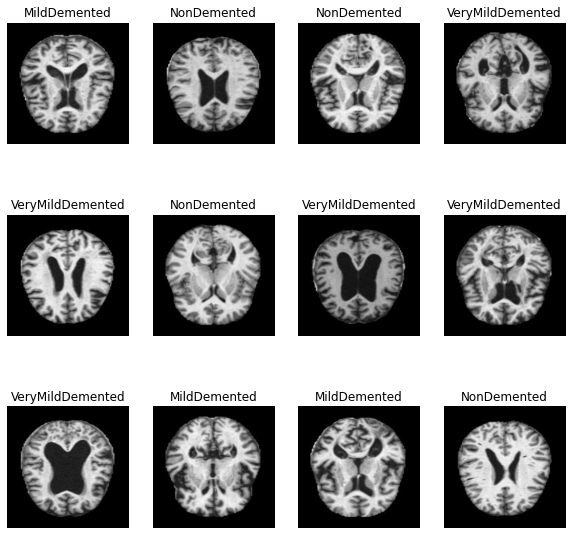

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

img
label: VeryMildDemented black% 0.4800872802734375


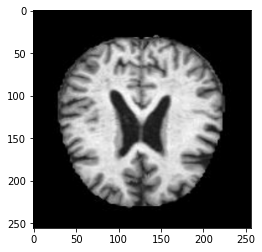

In [ ]:
for images_batch, labels_batch in dataset.take(1):

    img = images_batch[0].numpy().astype('uint8')
    lab = labels_batch[0].numpy()
    b, g, r = cv2.split(img)
wb = b == 0
wg = g == 0
wr = r == 0
black_pixels_if_true = np.bitwise_and(wb, np.bitwise_and(wg, wr))
img_size = r.size
black_pixels_count = np.sum(black_pixels_if_true)
black_area_ratio = black_pixels_count / img_size
print("img")
plt.imshow(img)
print("label:",class_names[lab],"black%",black_area_ratio)




another way to find black%

black pixel percentage: 46.47
img
label: NonDemented black% 46.4691162109375


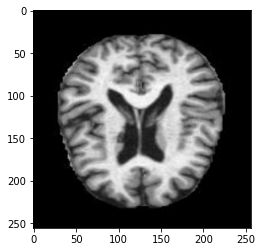

In [ ]:
for images_batch, labels_batch in dataset.take(1):

    img = images_batch[0].numpy().astype('uint8')
    lab = labels_batch[0].numpy()


black = [0, 0, 0]

diff = 0

boundaries = [([black[2], black[1]-diff, black[0]-diff],
           [black[2]+diff, black[1]+diff, black[0]+diff])]

scalePercent=1

for (lower, upper) in boundaries:


    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)


    mask = cv2.inRange(img, lower, upper)


    output = cv2.bitwise_and(img, img, mask=mask)


    ratio_black = cv2.countNonZero(mask)/(img.size/3)


    colorPercent = (ratio_black * 100) / scalePercent

    # Print the color percent, using 2 figures past the decimal point
    print('black pixel percentage:', np.round(colorPercent, 2))
    print("img")
plt.imshow(img)
print("label:",class_names[lab],"black%",colorPercent)

Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training
Validation: Dataset to be tested against while training
Test: Dataset to be tested against after we trained a model

In [ ]:
len(dataset)

100

In [ ]:
train_size = 0.8
#dec ti 70
len(dataset)*train_size

80.0

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Confirming partition sizes

In [ ]:
len(train_ds)

80

In [ ]:
len(val_ds)

10

In [ ]:
len(test_ds)

10

Cache, Shuffle, and Prefetch the Dataset


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model
Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

we need to resize (256,256) image to again (256,256). as this will be useful when we are done with the training and start using the model for predictions. At that time one may supply an image that is not (256,256) and this layer will resize it

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

# Data Augmentation
This will boost the accuracy of our model by augmenting the data.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomWidth(0.2),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomHeight(0.1)
  ])
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip

# Applying Data Augmentation to Train Dataset

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

**Model Architecture**

We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

We are going to use convolutional neural network (CNN).

In [ ]:
from keras.layers import LeakyReLU

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
from keras_sequential_ascii import keras2ascii

In [ ]:
#in architecture, 32,64,64,128,128,256
#add batch normalsiation
#dropout
#dense layer of 256, 512 1024
#leaky relu




In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (64, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (64, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (64, 127, 127, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (64, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (64, 60, 60, 128)        

**Compiling the Model**


We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [ ]:
#model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

IndentationError: ignored

In [ ]:
#history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=300,
)

In [ ]:
keras2ascii(model)

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [ ]:
type(history.history['loss'])


In [ ]:
len(history.history['loss'])

In [ ]:

history.history['loss'][:5] # show loss for first 5 epochs

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Run prediction on a sample image**

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Running inference on few sample images**

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 6.9 MB/s 


VISUALIZING ARCHITECTURE

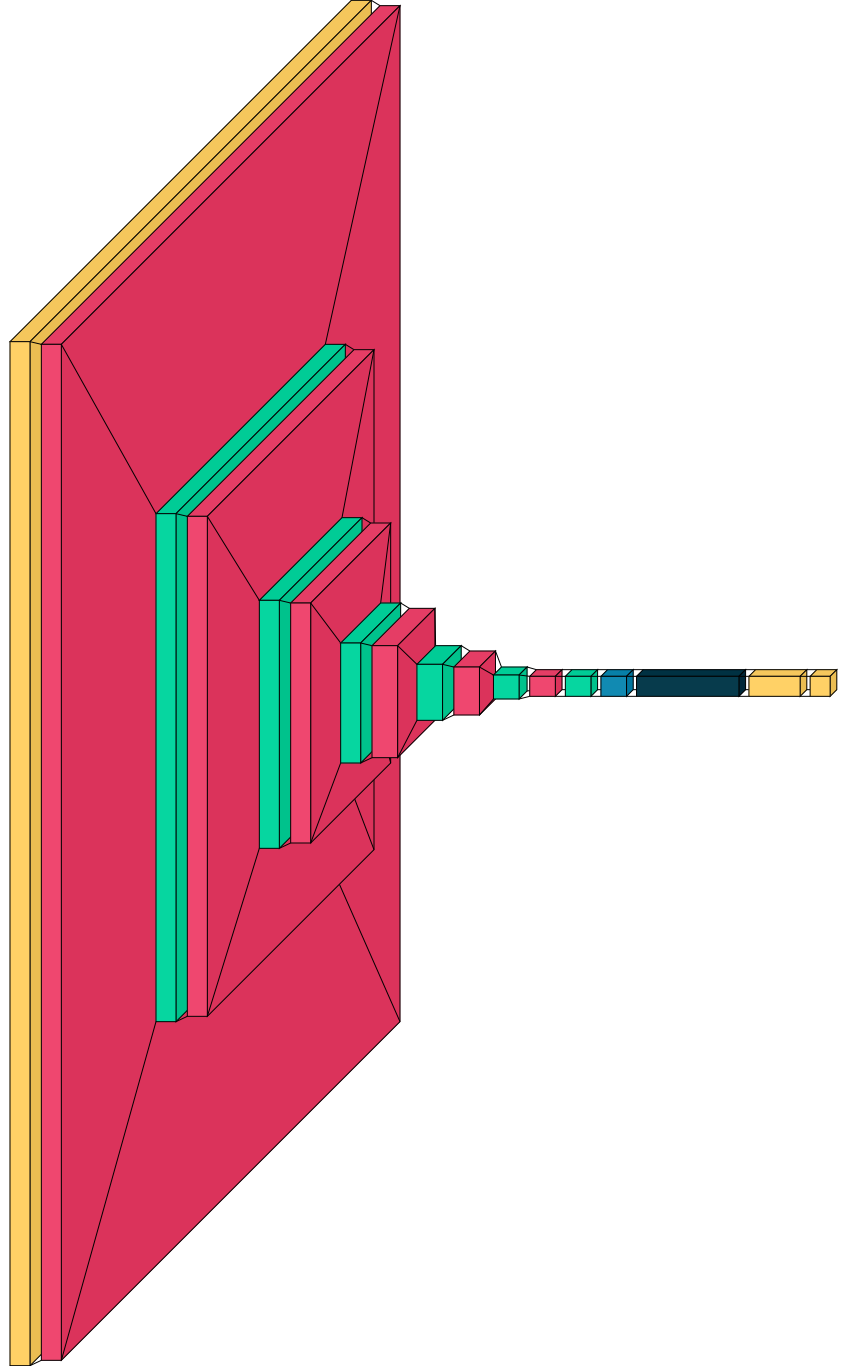

In [ ]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show


visualkeras.layered_view(model)

# Saving the Model
We append the model to the list of models as a new version

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/modelwide/") + [0]])+1
model.save(f"/content/drive/MyDrive/modelwide/{model_version}")

In [ ]:
model_version


In [ ]:
model.save("../AZw.h5")

# Loading old model(3.0) and testing it

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/model3.0/1/')

# Check its architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)       

In [ ]:
scores = new_model.evaluate(test_ds)

In [ ]:
# Evaluate the restored model
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(new_model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Now loading model v1

In [ ]:
modelv1 = tf.keras.models.load_model('/content/drive/MyDrive/Models/1/')

# Check its architecture
modelv1._name = "modelv1"
modelv1.summary()


In [ ]:
scores = modelv2.evaluate(test_ds)

In [ ]:
modelv2 = tf.keras.models.load_model('/content/drive/MyDrive/Models/2/')

# Check its architecture
modelv2.summary()

In [ ]:
scores = modelv2.evaluate(test_ds)

ensemble of newmodel(model3.0) and modelv2





In [ ]:
models = [new_model, modelv2]
model_input = tf.keras.Input(shape=(256, 256, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = tf.keras.layers.Average()(model_outputs)
ensemble_model = tf.keras.Model(inputs=model_input, outputs=ensemble_output)

In [ ]:
ensemble_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
scores = ensemble_model.evaluate(test_ds)

Now ensembling all three models modelv1 modelv2 and model3.0(new_model)

In [ ]:
models3 = [new_model,  modelv1 ,modelv2]
model_input = tf.keras.Input(shape=(256, 256, 3))
model_outputs3 = [model(model_input) for model in models3]
ensemble_output3 = tf.keras.layers.Average()(model_outputs3)
ensemble_model3 = tf.keras.Model(inputs=model_input, outputs=ensemble_output3)

In [ ]:
ensemble_model3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
# Evaluate the restored model
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(ensemble_model3, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
scores = ensemble_model3.evaluate(test_ds)

A jump in accuracy of 13% has been observed when comparing the ensembled model with the original


# Now testing Weighted Ensemble

In [ ]:
class WeightedAverageLayer(tf.keras.layers.Layer):
    def __init__(self, w1, w2, w3, **kwargs):
        super(WeightedAverageLayer, self).__init__(**kwargs)
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3

    def call(self, inputs):
        return self.w1 * inputs[0] + self.w2 * inputs[1]

In [ ]:
ensemble_output_weighted = WeightedAverageLayer(0.3, 0.6, 0.1)(model_outputs3)

In [ ]:
ensemble_model_weighted = tf.keras.Model(inputs=model_input, outputs=ensemble_output_weighted)

In [ ]:
ensemble_model_weighted.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
scores = ensemble_model_weighted.evaluate(test_ds)